In [95]:
import pandas as pd

In [96]:
df=pd.read_csv("weather_prediction_dataset.csv")

In [97]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [98]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
None
               DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.3303

In [99]:
df.isnull().sum().sort_values(ascending=False)

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
                         ..
TOURS_global_radiation    0
TOURS_precipitation       0
TOURS_temp_mean           0
TOURS_temp_min            0
TOURS_temp_max            0
Length: 165, dtype: int64

# set date and handle missing Values

In [100]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [101]:
df = df.sort_values('DATE').set_index('DATE')

In [102]:
df = df.interpolate(method='time')

In [103]:
df = df.ffill().bfill()

# Feature Engineering

In [104]:
for lag in [1, 3, 7]:
    df[f'BASEL_temp_mean_lag{lag}'] = df['BASEL_temp_mean'].shift(lag)

In [105]:
df['BASEL_temp_mean_roll7'] = df['BASEL_temp_mean'].rolling(window=7).mean()

In [106]:
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear

In [107]:
df.head()

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,...,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,BASEL_temp_mean_lag1,BASEL_temp_mean_lag3,BASEL_temp_mean_lag7,BASEL_temp_mean_roll7,month,dayofyear
DATE,,,,,,,,,,,,,,,,,,,,,
2000-01-01,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,...,0.04,8.5,7.2,9.8,NaN,NaN,NaN,NaN,1,1
2000-01-02,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,...,0.16,7.9,6.6,9.2,2.9,NaN,NaN,NaN,1,2
2000-01-03,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,...,0.00,8.1,6.6,9.6,3.6,NaN,NaN,NaN,1,3
2000-01-04,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,...,0.44,8.6,6.4,10.8,2.2,2.9,NaN,NaN,1,4
2000-01-05,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,...,0.04,8.0,6.4,9.5,3.9,3.6,NaN,NaN,1,5


In [108]:
df = df.dropna()

In [109]:
X = df.drop(columns=['BASEL_temp_mean'])  
y = df['BASEL_temp_mean']

# Train test split

In [110]:
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
df_final = df.dropna()  

In [114]:
df_final.to_csv("prepared_weather_data_.csv")

In [115]:
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (2917, 169)
Testing shape: (730, 169)


In [116]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


# Evaluation


In [117]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = svm_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 1.966587317709835
R² Score: 0.963543274209574


In [118]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [119]:
values=[i for i in range(1,21)]

In [120]:
train_scores = []
test_scores = []

for i in values:
    model = DecisionTreeRegressor(max_depth=i)
    model.fit(X_train_scaled, y_train)
    train_yhat = model.predict(X_train_scaled)
    train_r2 = r2_score(y_train, train_yhat)
    test_yhat = model.predict(X_test_scaled)
    test_r2 = r2_score(y_test, test_yhat)
    train_scores.append(train_r2)
    test_scores.append(test_r2)
    print('>%d, train : %.3f, test: %.3f' % (i, train_r2, test_r2))

print(len(values), len(train_scores), len(test_scores))


>1, train : 0.682, test: 0.705
>2, train : 0.887, test: 0.876
>3, train : 0.946, test: 0.937
>4, train : 0.969, test: 0.963
>5, train : 0.983, test: 0.978
>6, train : 0.990, test: 0.986
>7, train : 0.994, test: 0.988
>8, train : 0.996, test: 0.988
>9, train : 0.998, test: 0.986
>10, train : 0.999, test: 0.986
>11, train : 1.000, test: 0.985
>12, train : 1.000, test: 0.984
>13, train : 1.000, test: 0.984
>14, train : 1.000, test: 0.984
>15, train : 1.000, test: 0.984
>16, train : 1.000, test: 0.985
>17, train : 1.000, test: 0.984
>18, train : 1.000, test: 0.985
>19, train : 1.000, test: 0.985
>20, train : 1.000, test: 0.984
20 20 20


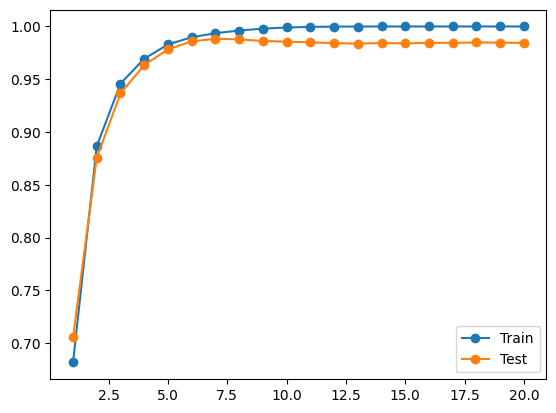

In [121]:
pyplot.plot(values, train_scores,'-o',label="Train")
pyplot.plot(values, test_scores,'-o',label="Test")
pyplot.legend()
pyplot.show()

# Tuning hyper-parameter

In [122]:
param_grid = [
    {'C': [0.1, 1], 'epsilon': [0.1], 'kernel': ['linear']},
    {'C': [0.1, 1], 'epsilon': [0.1], 'kernel': ['rbf'], 'gamma': ['scale']}
]


# for small dataset (explore all possible combos)

In [123]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(
#     SVR(max_iter=1000),  # prevent endless convergence loops
#     param_grid,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=1,
#     verbose=1
# )


# For Large dataset (Picks random combos)

In [124]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    SVR(max_iter=1000),
    param_distributions=param_grid,
    n_iter=3,
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=1,
    verbose=1
)


In [125]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [126]:
y_train = y_train.values.ravel()   # make it 1D

In [127]:
import numpy as np
print(np.isnan(X_train_scaled).sum(), np.isnan(y_train).sum())


0 0


In [128]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2],
    'kernel': ['linear', 'rbf'], 
    'gamma': ['scale']   # avoid 'auto' for now
}

grid = GridSearchCV(
    SVR(max_iter=1000),   # cap solver iterations
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

Best Parameters: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Score: -0.3785437458634056


c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [129]:
SVR(max_iter=5000)


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,5000


In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # compress to 5 main features
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

grid.fit(X_train_pca, y_train)


c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

,estimator,SVR(max_iter=1000)
,param_grid,"{'C': [0.1, 1, ...], 'epsilon': [0.1, 0.2], 'gamma': ['scale'], 'kernel': ['linear', 'rbf']}"
,scoring,'neg_mean_squared_error'
,n_jobs,1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,kernel,'rbf'


In [131]:
best_svr = SVR(C=10, max_iter=5000)  
best_svr.fit(X_train_scaled, y_train)


c:\Users\Anas Fareedi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,10
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,5000


In [132]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_svr.predict(X_test_scaled)

print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Test MSE: 1.3114776600176181
Test R²: 0.9756877403810318


In [133]:
import joblib
joblib.dump(best_svr, "svr_model.pkl")


['svr_model.pkl']

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR 
import joblib

# Train pipeline with ONLY 6 columns
X = df[['BASEL_temp_mean_lag1', 'BASEL_temp_mean_lag3',
        'BASEL_temp_mean_lag7', 'BASEL_temp_mean_roll7',
        'month', 'dayofyear']]
y = df['BASEL_temp_mean']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

pipeline.fit(X, y)
joblib.dump(pipeline, "weather_pipeline_3.pkl")


['weather_pipeline_3.pkl']

In [135]:
model = joblib.load("svr_model.pkl")
y_pred = model.predict(X_test_scaled)


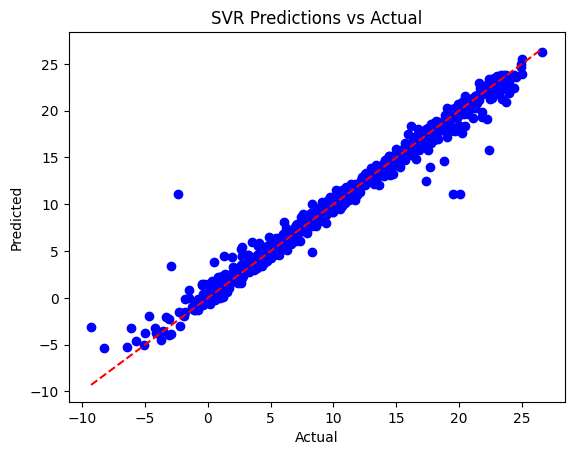

In [136]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("SVR Predictions vs Actual")
plt.show()


In [137]:
y_pred = best_svr.predict(X_test_scaled)
print(y_pred[:10])   # first 10 predicted weather values

[1.36294646 1.48269742 6.34981387 6.859038   7.01720109 3.71341112
 3.19213804 5.92696336 7.58619485 5.05981879]


In [138]:
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Actual: -0.50, Predicted: 1.36
Actual: -0.30, Predicted: 1.48
Actual: 6.30, Predicted: 6.35
Actual: 6.40, Predicted: 6.86
Actual: 7.00, Predicted: 7.02
Actual: 3.70, Predicted: 3.71
Actual: 3.70, Predicted: 3.19
Actual: 6.10, Predicted: 5.93
Actual: 7.30, Predicted: 7.59
Actual: 4.70, Predicted: 5.06
